# Project-8

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/air-quality-data-set")

print("Path to dataset files:", path)

100%|██████████| 248k/248k [00:00<00:00, 589kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/air-quality-data-set/versions/1


In [ ]:
!cp /root/.cache/kagglehub/datasets/fedesoriano/air-quality-data-set/versions/1/AirQuality.csv /content/

In [24]:
import pandas as pd

file_path = "/content/AirQuality.csv"

df = pd.read_csv(file_path, sep=';', decimal = ",")

In [25]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


### Hedefimiz

Giriş: tüm gaz ölçümleri, sıcaklık, nem vs.
Çıkış: CO(GT) Karbonmonoksit değeri

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [27]:
df_clean = df.drop(columns=["Date", "Time", "Unnamed: 15", "Unnamed: 16"], errors='ignore')

In [28]:
df_clean

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

In [31]:
df_clean = df_clean.dropna()

In [32]:
df_clean

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [37]:
X = df_clean.drop(columns=["CO(GT)"])
Y = df_clean["CO(GT)"].values.reshape(-1, 1)

In [38]:
Y

array([[2.6],
       [2. ],
       [2.2],
       ...,
       [2.4],
       [2.1],
       [2.2]])

In [39]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X)
Y_scaled = scaler_y.fit_transform(Y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}



In [59]:
results = {}
for name, model in models.items():
  model.fit(X_train, y_train.ravel())
  y_pred = model.predict(X_test).reshape(-1,1)
  y_pred_inv = scaler_y.inverse_transform(y_pred)
  y_test_inv = scaler_y.inverse_transform(y_test)
  mse = mean_squared_error(y_test_inv, y_pred_inv)
  r2 = r2_score(y_test_inv, y_pred_inv)
  results[name] = {"y_pred": y_pred_inv, "mse": mse, "r2": r2}

results

{'Linear Regression': {'y_pred': array([[ -26.41543235],
         [ -34.09572131],
         [  -7.4350667 ],
         ...,
         [ -31.49860138],
         [  -5.12052476],
         [-143.99754643]]),
  'mse': 2863.6089690433723,
  'r2': 0.5153096813141793},
 'Ridge Regression': {'y_pred': array([[ -26.36329818],
         [ -34.0444134 ],
         [  -7.61841099],
         ...,
         [ -31.47395752],
         [  -5.12578268],
         [-144.10117258]]),
  'mse': 2863.5215635181025,
  'r2': 0.5153244754471619},
 'Lasso Regression': {'y_pred': array([[ -29.42626924],
         [ -37.67345618],
         [  -3.99744284],
         ...,
         [ -35.95529224],
         [  -1.59201331],
         [-122.89438792]]),
  'mse': 3091.2169574904524,
  'r2': 0.4767850818844229},
 'Random Forest': {'y_pred': array([[ -35.02 ],
         [ -41.356],
         [   2.613],
         ...,
         [ -39.216],
         [   0.284],
         [-191.937]]),
  'mse': 2067.266360006089,
  'r2': 0.650097481300

In [47]:
y_train.ravel()

array([0.48430214, 0.45597098, 0.45597098, ..., 0.4868777 , 0.49202882,
       0.48945326])

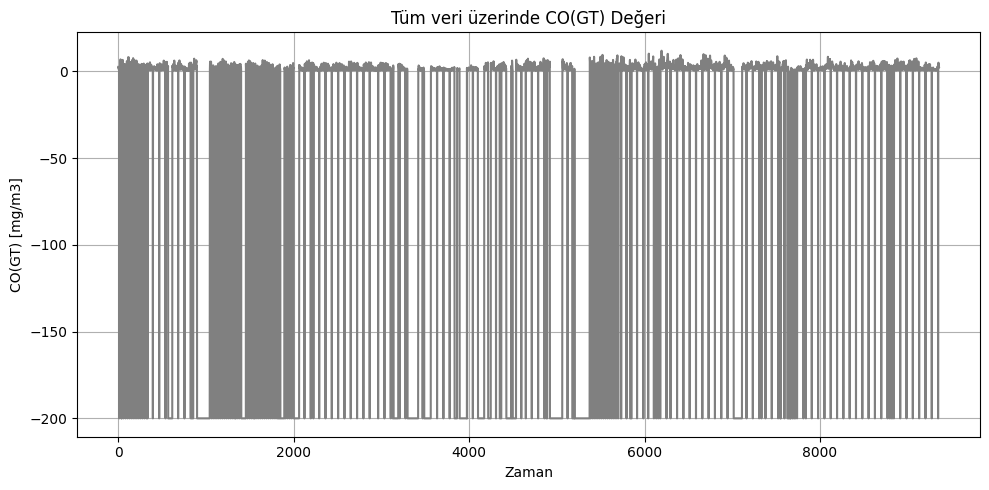

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_clean["CO(GT)"].values, color='gray')
plt.title("Tüm veri üzerinde CO(GT) Değeri")
plt.xlabel("Zaman")
plt.ylabel("CO(GT) [mg/m3]")
plt.grid(True)
plt.tight_layout()
plt.show()

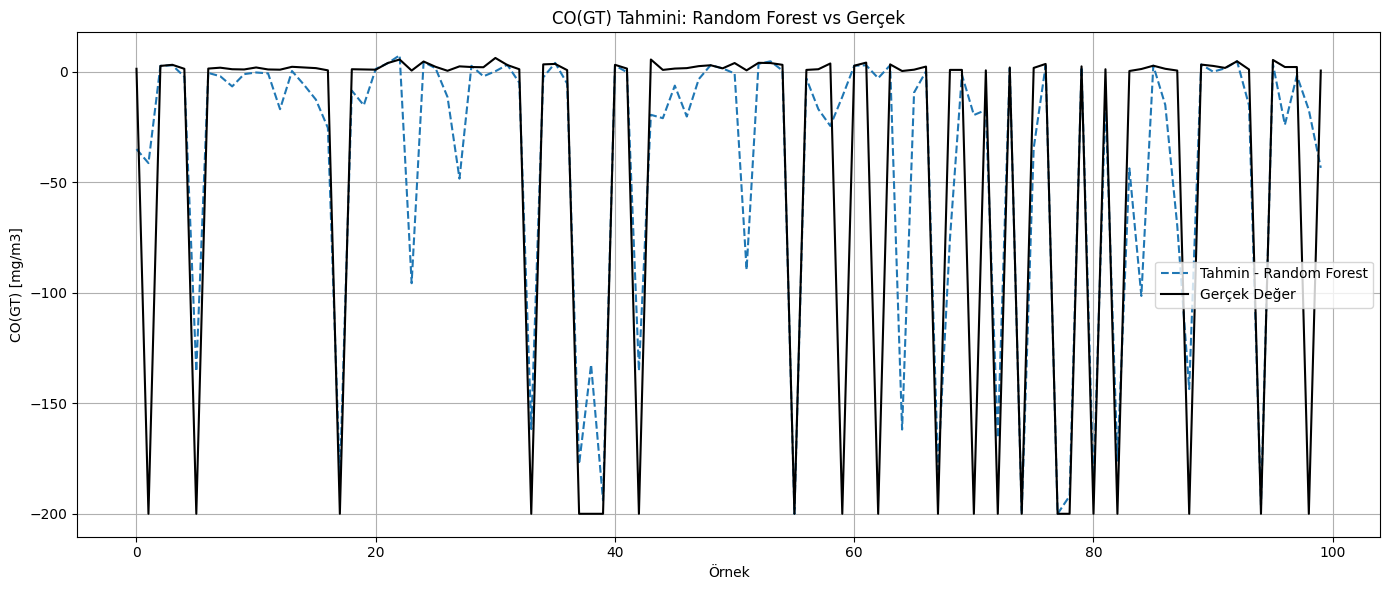

In [61]:
plt.figure(figsize=(14, 6))
plt.plot(results["Random Forest"]["y_pred"][:100], label="Tahmin - Random Forest", linestyle = '--')
plt.plot(scaler_y.inverse_transform(y_test)[:100], label="Gerçek Değer", color="black")
plt.title("CO(GT) Tahmini: Random Forest vs Gerçek")
plt.xlabel("Örnek")
plt.ylabel("CO(GT) [mg/m3]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

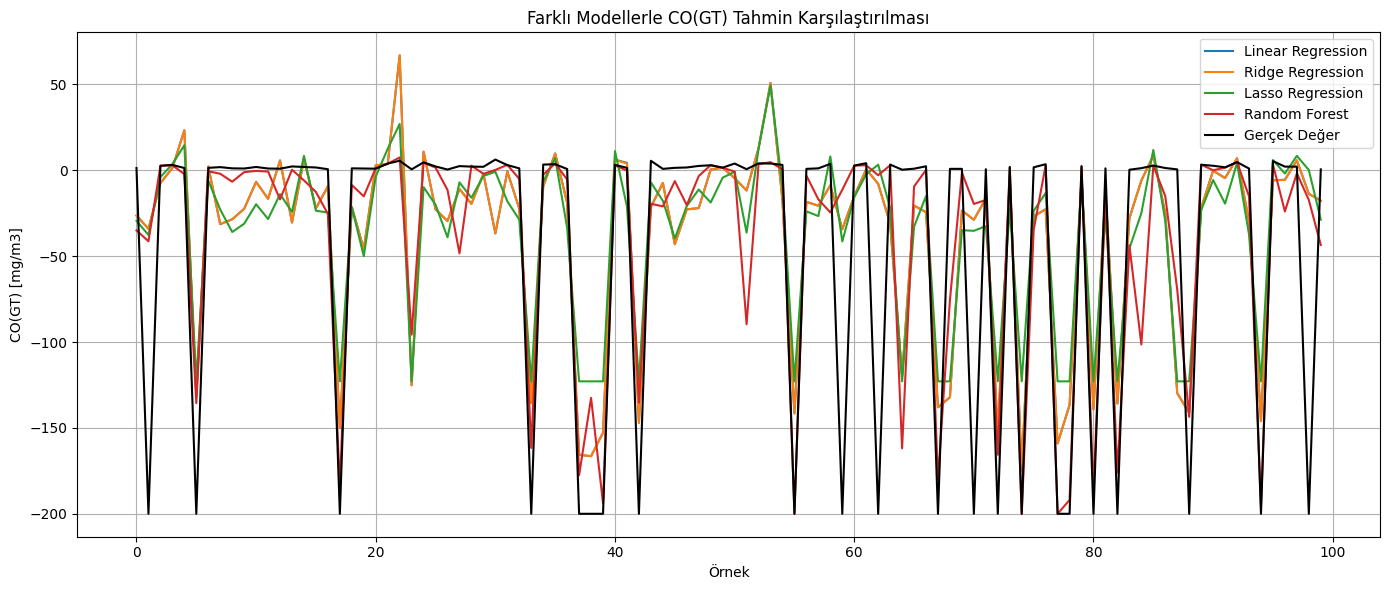

In [62]:
plt.figure(figsize=(14, 6))
for name in results:
  plt.plot(results[name]["y_pred"][:100], label=f"{name}")
plt.plot(scaler_y.inverse_transform(y_test)[:100], label="Gerçek Değer", color="black")
plt.title("Farklı Modellerle CO(GT) Tahmin Karşılaştırılması")
plt.xlabel("Örnek")
plt.ylabel("CO(GT) [mg/m3]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### ANN

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [68]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose = 0)

In [69]:
y_pred_scaled = model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [70]:
y_pred_scaled

array([[ 0.2877922 ],
       [-0.03058645],
       [ 0.57957476],
       ...,
       [ 0.2076354 ],
       [ 0.5343805 ],
       [-1.6569638 ]], dtype=float32)

In [71]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [72]:
y_pred

array([[ -11.859589],
       [ -36.582653],
       [  10.798206],
       ...,
       [ -18.084007],
       [   7.288734],
       [-162.87576 ]], dtype=float32)

In [73]:
y_test_inv = scaler_y.inverse_transform(y_test)

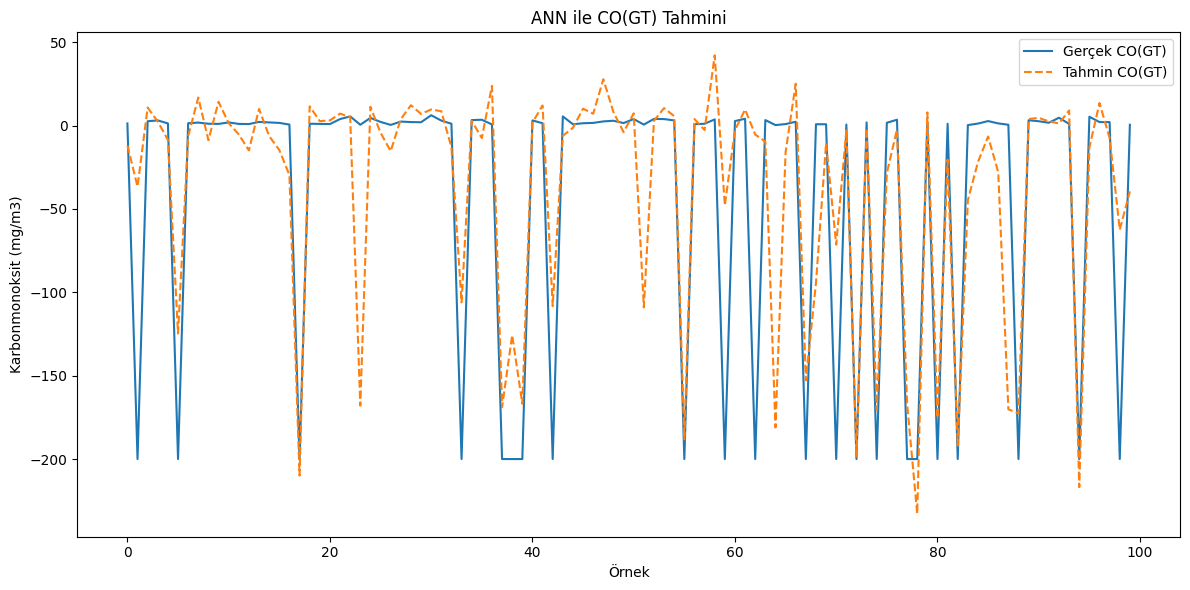

In [74]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv[:100], label="Gerçek CO(GT)")
plt.plot(y_pred[:100], label="Tahmin CO(GT)", linestyle="--")
plt.title("ANN ile CO(GT) Tahmini")
plt.xlabel("Örnek")
plt.ylabel("Karbonmonoksit (mg/m3)")
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled)

In [76]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

In [77]:
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R2   : {r2:.2f}")

MSE  : 2126.43
RMSE : 46.11
MAE  : 24.95
R2   : 0.64
